In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

koi_disposition  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       CONFIRMED              0              0              0              0   
1  FALSE POSITIVE              0              1              0              0   
2  FALSE POSITIVE              0              1              0              0   
3       CONFIRMED              0              0              0              0   
4       CONFIRMED              0              0              0              0   

   koi_period  koi_period_err1  koi_period_err2  koi_time0bk  \
0   54.418383     2.479000e-04    -2.479000e-04   162.513840   
1   19.899140     1.490000e-05    -1.490000e-05   175.850252   
2    1.736952     2.630000e-07    -2.630000e-07   170.307565   
3    2.525592     3.760000e-06    -3.760000e-06   171.595550   
4    4.134435     1.050000e-05    -1.050000e-05   172.979370   

   koi_time0bk_err1  ...  koi_steff_err2  koi_slogg  koi_slogg_err1  \
0          0.003520  ...             -81      4.467           0.064   
1          0.000581  ...            -176      4.544           0.044   
2          0.000115  ...            -174      4.564           0.053   
3          0.001130  ...            -211      4.438           0.070   
4          0.001900  ...            -232      4.486           0.054   

   koi_slogg_err2  koi_srad  koi_srad_err1  koi_srad_err2         ra  \
0          -0.096     0.927          0.105         -0.061  291.93423   
1          -0.176     0.868          0.233         -0.078  297.00482   
2          -0.168     0.791          0.201         -0.067  285.53461   
3          -0.210     1.046          0.334         -0.133  288.75488   
4          -0.229     0.972          0.315         -0.105  296.28613   

         dec  koi_kepmag  
0  48.141651      15.347  
1  48.134129      15.436  
2  48.285210      15.597  
3  48.226200      15.509  
4  48.224670      15.714  

[5 rows x 41 columns]

In [5]:
df.shape

(6991, 41)

In [6]:
df.koi_disposition.value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [7]:
# Replace the labels by values
kepler_df = df.replace({'CONFIRMED': 0, 'CANDIDATE': 1, 'FALSE POSITIVE': 2})
target_names=["CONFIRMED", "CANDIDATE","FALSE POSITIVE"]

In [8]:
kepler_df.dtypes

koi_disposition        int64
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq                int64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num       int64
koi_steff              int64
koi_steff_err1         int64
koi_steff_err2         int64
koi_slogg            float64
koi_slogg_err1       float64
koi_slogg_err2

# Select your features (columns)

In [9]:
# Set features. This will also be used as your x values.
selected_features = kepler_df[['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec','koi_period','koi_time0bk','koi_impact','koi_duration','koi_depth','koi_prad','koi_teq','koi_insol','koi_model_snr','koi_tce_plnt_num','koi_steff','koi_slogg','koi_srad','ra','dec','koi_kepmag']]

In [10]:
exoplanet_class = kepler_df.koi_disposition.values.reshape(-1,1)

In [11]:
print(selected_features.shape, exoplanet_class.shape)

(6991, 20) (6991, 1)


# Create a Train Test Split

Use `koi_disposition` for the y values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, exoplanet_class, random_state=42)

In [13]:
X_train.head()

koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  \
6122              0              0              0              0    6.768901   
6370              0              1              0              1    0.733726   
2879              1              0              0              0    7.652707   
107               0              0              0              0    7.953547   
29                0              0              0              0    4.959319   

      koi_time0bk  koi_impact  koi_duration  koi_depth  koi_prad  koi_teq  \
6122   133.077240       0.150       3.61600      123.1      1.24     1017   
6370   132.020050       0.291       2.30900      114.6      0.86     1867   
2879   134.460380       0.970      79.89690      641.1      3.21      989   
107    174.662240       0.300       2.63120      875.4      2.25      696   
29     172.258529       0.831       2.22739     9802.0     12.21     1103   

      koi_insol  koi_model_snr  koi_tce_plnt_num  koi_steff  koi_slogg  \
6122     253.30           10.8                 1       5737      4.327   
6370    2891.64           13.8                 1       5855      4.578   
2879     226.81          254.3                 1       6328      4.481   
107       55.37           38.4                 1       4768      4.536   
29       349.40          696.5                 1       5712      4.359   

      koi_srad         ra        dec  koi_kepmag  
6122     1.125  294.40472  39.351681      14.725  
6370     0.797  284.50391  42.463860      15.770  
2879     0.963  295.50211  38.983540      13.099  
107      0.779  291.15878  40.750271      15.660  
29       1.082  292.16705  48.727589      15.263

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [14]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [15]:
# Use PCA to perform Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_scaled)

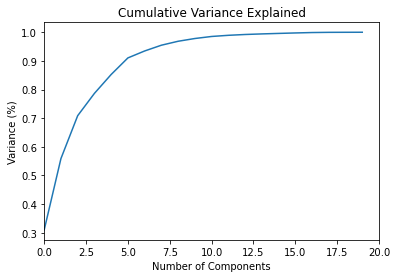

In [16]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.xlim((0,20))
plt.title('Cumulative Variance Explained')
plt.show()

In [17]:
# Pick 8 features to retain 95.4% variance
print (np.cumsum(pca.explained_variance_ratio_))

[0.30998595 0.55901037 0.70867141 0.78657303 0.85251009 0.91039369
 0.93461732 0.9547304  0.96852012 0.9781383  0.98523855 0.98928586
 0.99214257 0.99418783 0.99589591 0.99752915 0.99896752 0.99965174
 0.99986185 1.        ]


In [18]:
pca = PCA(n_components=8)
X_train_scaled = pca.fit_transform(X_train_scaled)
X_test_scaled = pca.fit_transform(X_test_scaled)
print(X_train_scaled.shape,X_test_scaled.shape)
print(y_train.shape,y_test.shape)

(5243, 8) (1748, 8)
(5243, 1) (1748, 1)


# Train the Model- SVC



In [19]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear')
classifier

SVC(kernel='linear')

In [20]:
classifier.fit(X_train_scaled, y_train.ravel())
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7879076864390616
Testing Data Score: 0.8009153318077803


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [21]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(classifier, param_grid, verbose=3)

In [22]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   0.2s
[CV 2/5] END ..............................C=1, gamma=0.0001; total time=   0.1s
[CV 3/5] END ..............................C=1, gamma=0.0001; total time=   0.1s
[CV 4/5] END ..............................C=1, gamma=0.0001; total time=   0.1s
[CV 5/5] END ..............................C=1, gamma=0.0001; total time=   0.1s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.2s
[CV 2/5] END ...............................C=1, gamma=0.001; total time=   0.2s
[CV 3/5] END ...............................C=1, gamma=0.001; total time=   0.1s
[CV 4/5] END ...............................C=1, gamma=0.001; total time=   0.2s
[CV 5/5] END ...............................C=1, gamma=0.001; total time=   0.2s
[CV 1/5] END ................................C=1, gamma=0.01; total time=   0.2s
[CV 2/5] END ................................C=1,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [23]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.0001}
0.7840913556349559


In [24]:
predictions = grid.predict(X_test_scaled)
print('Test Acc: %.3f' % grid.score(X_test_scaled, y_test))

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

Test Acc: 0.802
                precision    recall  f1-score   support

     CONFIRMED       0.61      0.81      0.70       484
     CANDIDATE       0.66      0.38      0.48       411
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.80      1748
     macro avg       0.75      0.73      0.72      1748
  weighted avg       0.80      0.80      0.79      1748



# Save the Model

In [34]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'SVC_trained.sav'
joblib.dump(classifier, filename)

['SVC_trained.sav']

In [30]:
# Load the model
svc_model = joblib.load(filename)

In [33]:
result_accuracy = svc_model.score(X_test_scaled, y_test)
print(
    f"SVC Accuracy: {result_accuracy}")

SVC Accuracy: 0.8009153318077803
